In this file, we'll continue learning exploratory data visualization — we'll learn about **seasonality**, **scatter plots**, and **correlation**.

We'll use time series data about bike sharing (recall that a time series is a series of data points listed in time order).

Bike sharing companies allow people to rent bikes for short trips. Someone can rent a bike from a station near their location, take a ride, and then return the bike to any other station.

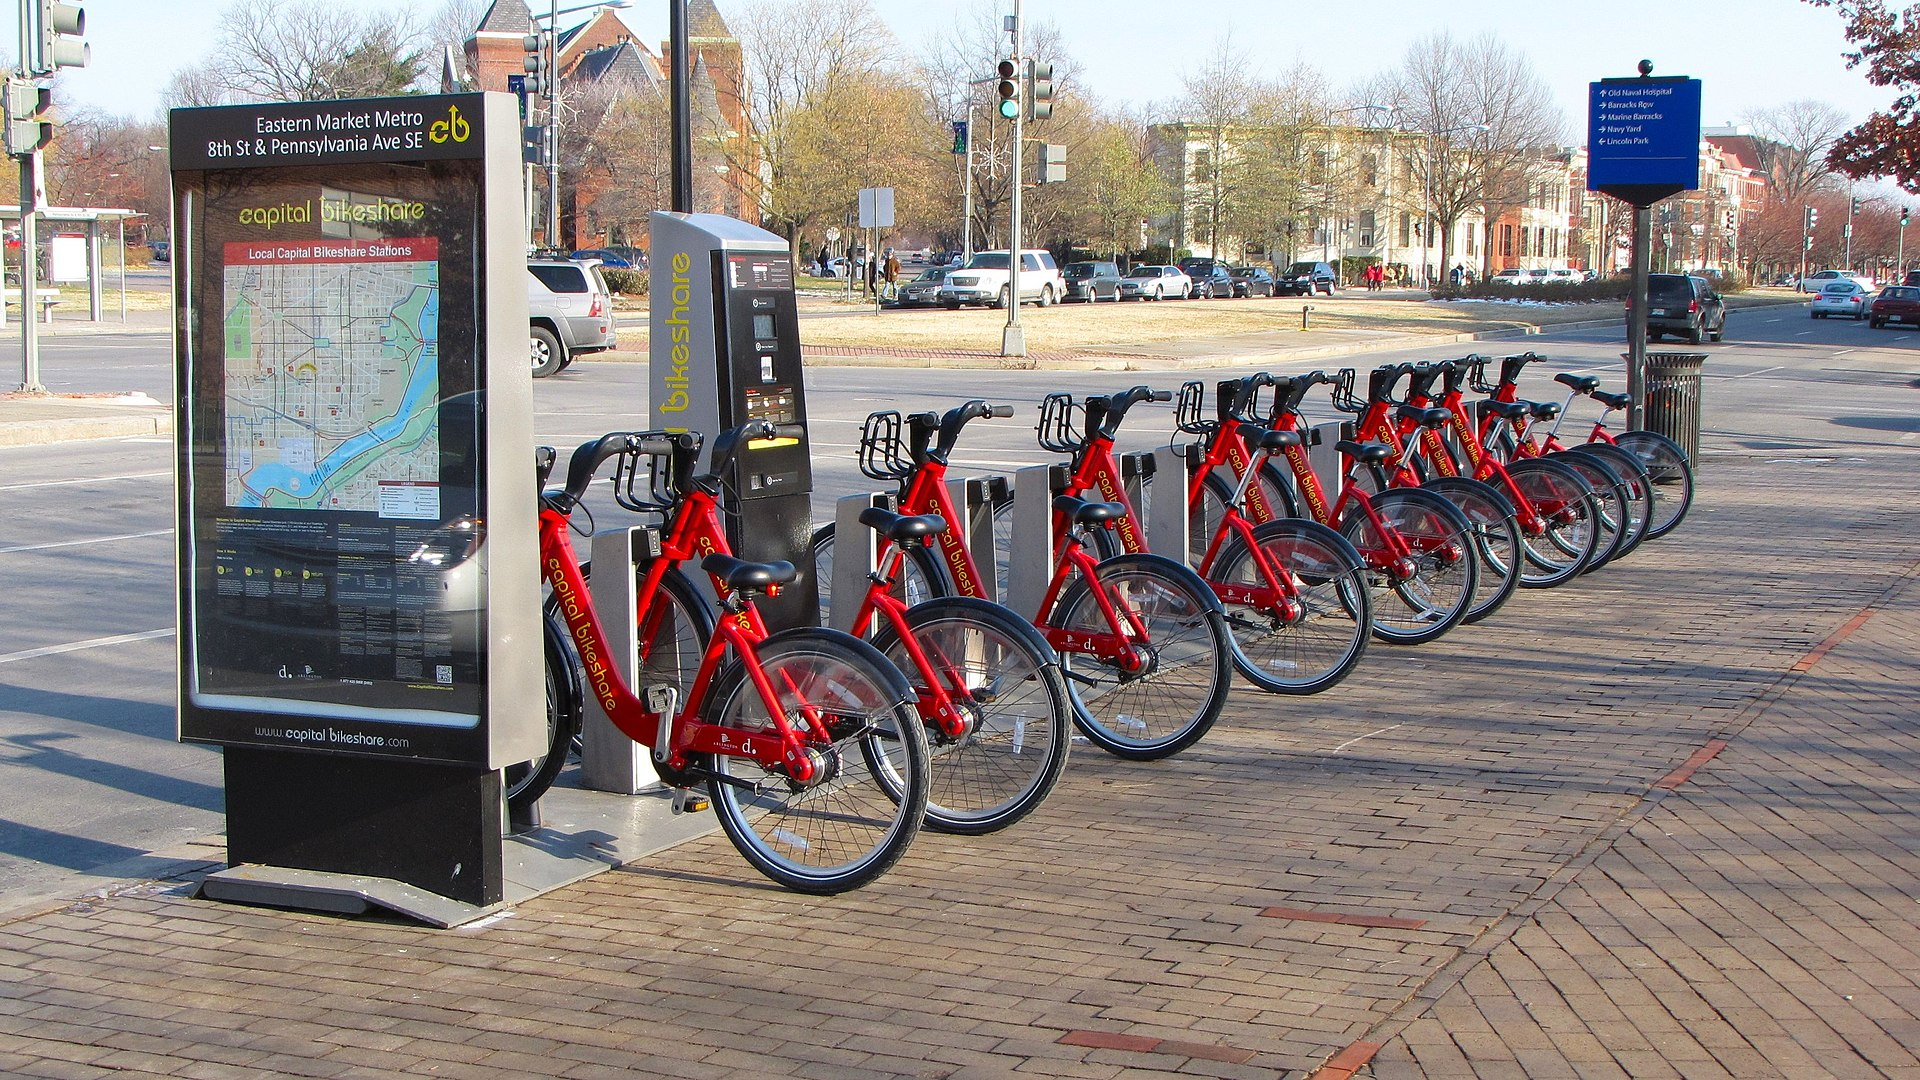

Our dataset describes the daily activity of **Capital Bikeshare (a bike-sharing company)**. Let's take a look at the first five rows:

In [1]:
import pandas as pd
bike_sharing = pd.read_csv('day.csv')

bike_sharing.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [2]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Each row describes the number of bike rentals for a single day and the corresponding weather. The data spans a period of two years (January 1, 2011 – December 31, 2012). Here are some of the columns we'll be focusing on:

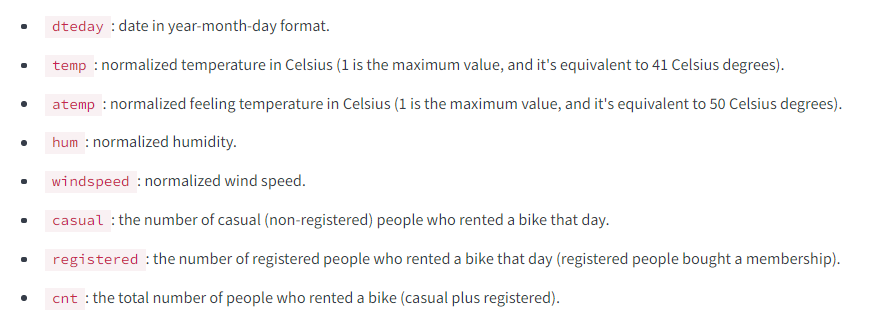

Researcher [Hadi Fanaee-T](https://www.researchgate.net/profile/Hadi_Fanaee-T) collected the dataset, and we can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).

We can start by visualizing how the total number of bike rentals changed over time. To do this, we'll create a line graph with the `dteday` column on the `x-axis` and the `cnt` column on the `y-axis`.

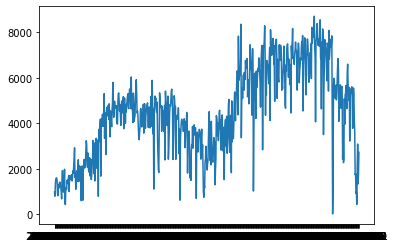

In [3]:
import matplotlib.pyplot as plt
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.show()

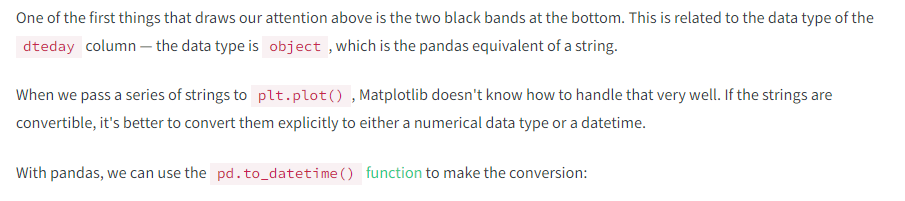

In [4]:
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

We converted the `dteday` column to `datetime`, and now we no longer see the black bands at the bottom.

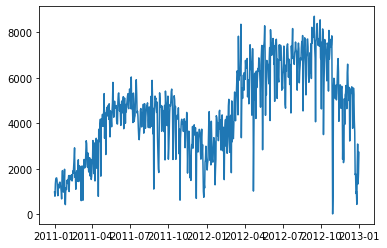

In [5]:
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.show()

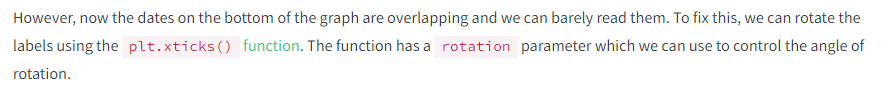

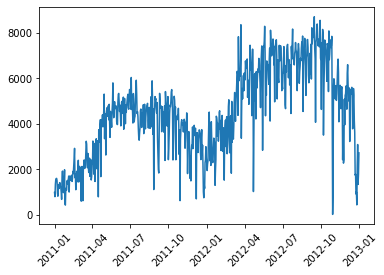

In [6]:
plt.plot(bike_sharing['dteday'], bike_sharing['cnt'])
plt.xticks(rotation=45)
plt.show()

Above we started by creating a line graph to examine how the total number of bike rentals changed over time.

Looking at the entire two-year period, we see the number of rented bikes is at its lowest during the winter months and at its highest during the summer (Capital Bikeshare operates only in the northern hemisphere, so the **summer** months are **June-August**, and the **winter** months are **December-February**).

In fact, we see quite a few similar patterns for both **2011** and **2012** with respect to the number of rented bikes:

* The number keeps increasing in the **January-May** interval.
* We see a **plateau** in the **May-September** interval, where the number of rentals stays high but constant (it neither increases nor decreases very much).
* The number keeps decreasing in the **September-December** interval.

We call all of these similarities **seasonal trends**. In time series data, we sometimes see specific patterns occurring regularly at specific intervals of time — we call this **seasonality**.

Weather, holidays, school vacations and other factors can often cause seasonality. One popular example is ice-cream sales seasonality, which we can attribute to variations in air temperature: sales are high during summer and low during winter.

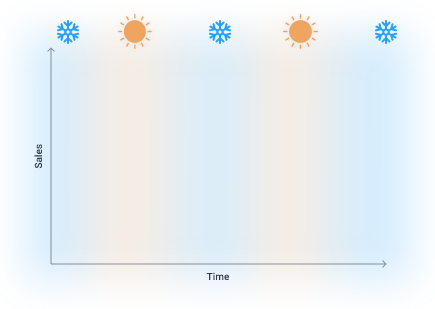

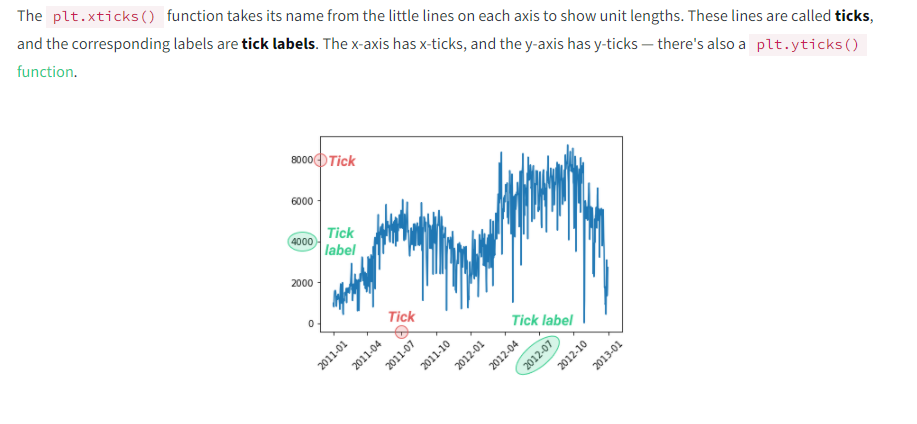

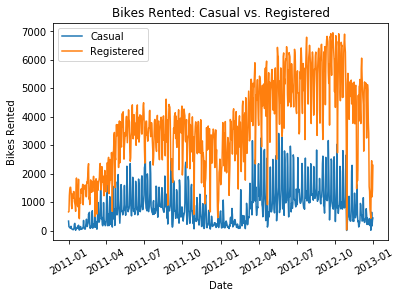

In [7]:
plt.plot(bike_sharing['dteday'], bike_sharing['casual'],
        label='Casual')

plt.plot(bike_sharing['dteday'], bike_sharing['registered'],
        label='Registered')

plt.xticks(rotation=30)
plt.ylabel('Bikes Rented')
plt.xlabel('Date')
plt.title('Bikes Rented: Casual vs. Registered')
plt.legend()
plt.show()

Identifying seasonality can be useful for businesses:

* They can plan marketing campaigns at the right time.
* They don't need to panic needlessly when the sales are decreasing as a result of seasonality.
* They can hire extra employees right before the period of high activity begins.

In our case, what could be causing the seasonality in the number of rented bikes?

Biking is an outdoor activity, and people often don't ride when it's too cold outside — the wind feels very cold when we're moving.

Let's see if we can find any similarity between how air temperature and the number of bikes rented changed over the course of **2011** and **2012**.

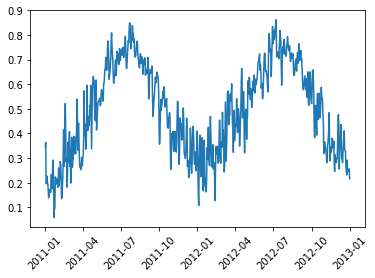

In [8]:
plt.plot(bike_sharing['dteday'], bike_sharing['temp'])
plt.xticks(rotation=45)
plt.show()

Above we've plotted `dteday` against `cnt` on a line graph, and we identified a few seasonal trends. We hypothesized that this seasonality might be related to temperature variations.

The similarity in how the air temperature and the number of rented bikes changed over **2011** and **2012** supports this hypothesis.

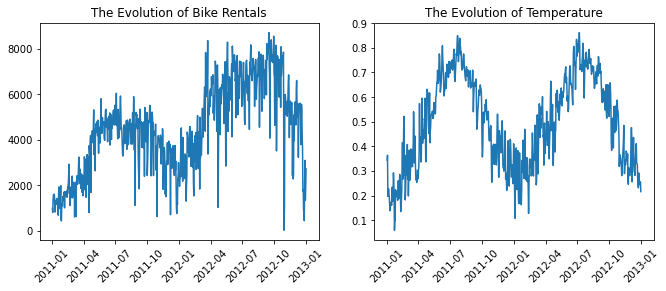

We see that when the temperature grows, the number of bike rentals tends to grow too. When the temperature decreases, the number of rentals tends to decrease too. Although the relationship isn't perfect, the values in the two columns follow similar patterns in how they change.

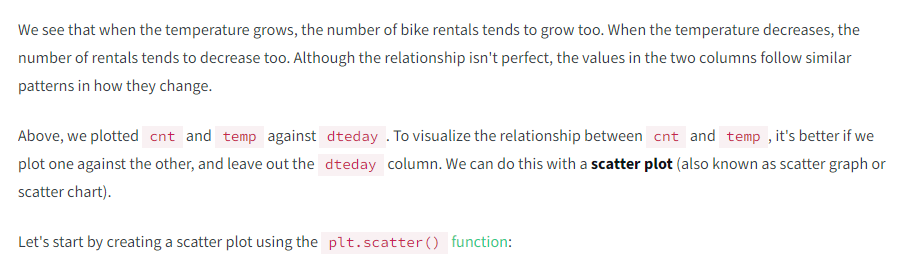

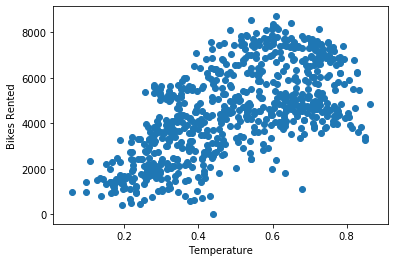

In [9]:
plt.scatter(bike_sharing['temp'], bike_sharing['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

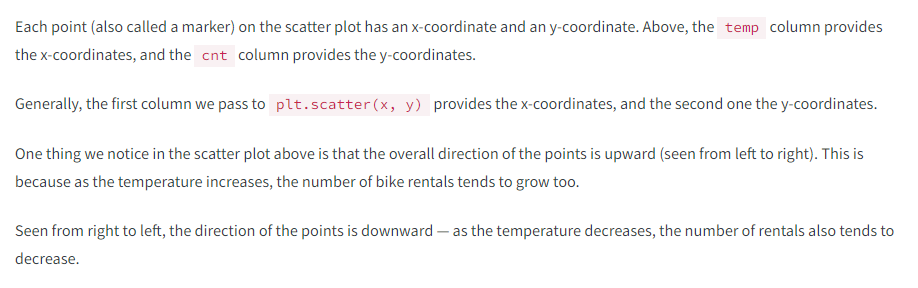

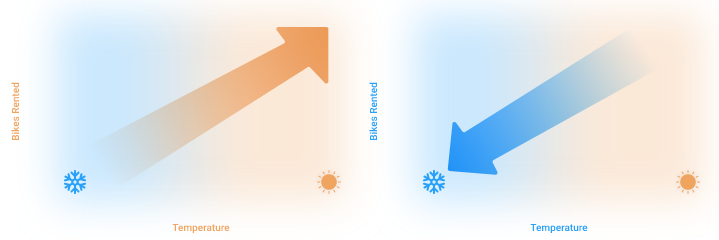

Let's now plot `windspeed` against `cnt` on a scatter plot. What direction of the points do we expect to see considering that a strong wind can cause people to rent fewer bikes?

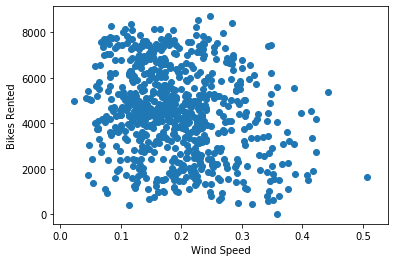

In [10]:
plt.scatter(bike_sharing['windspeed'], bike_sharing['cnt'])
plt.ylabel('Bikes Rented')
plt.xlabel('Wind Speed')
plt.show()

Above, we generated two scatter plots:

* `temp` versus `cnt`
* `windspeed` versus `cnt`

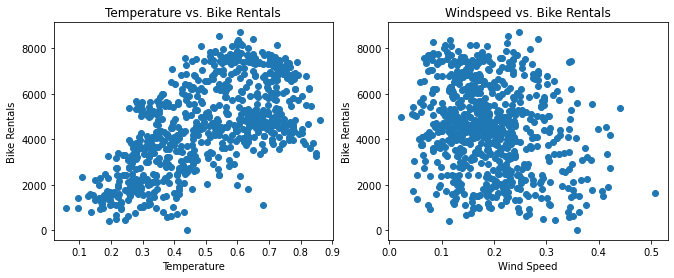

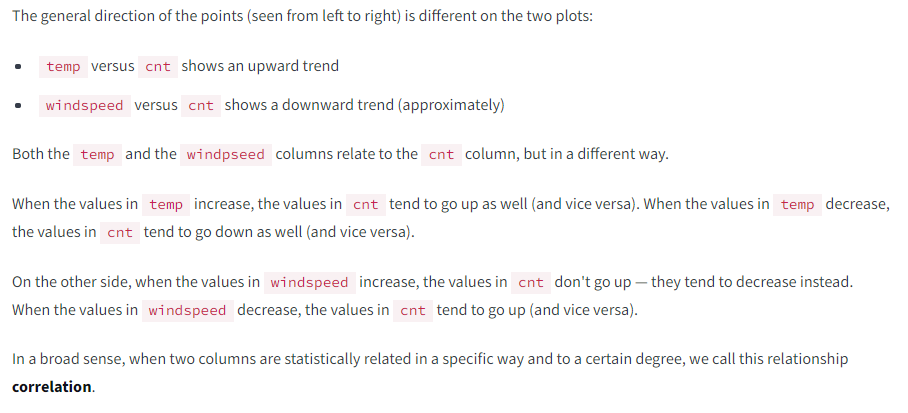

There are two kinds of correlation: **positive** and **negative**.

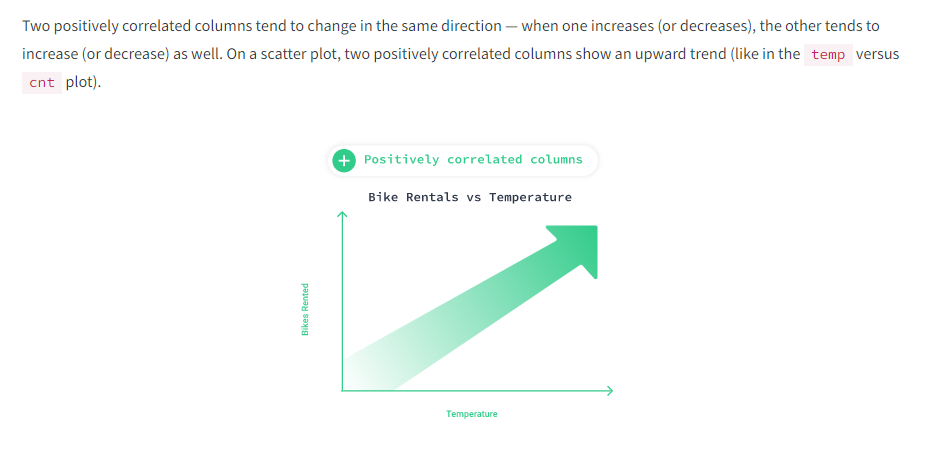

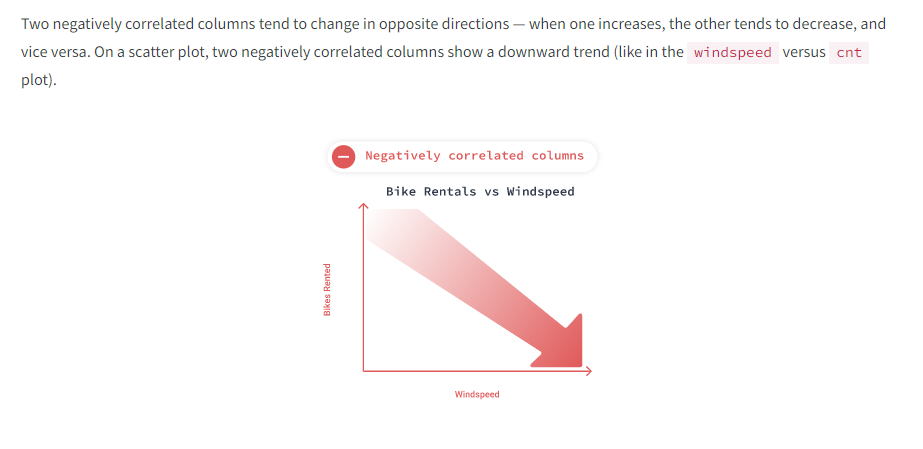

Not all pairs of columns are correlated. We often see two columns changing together in a way that shows no clear pattern. The values in the columns increase and decrease without any correlation.

As a side note, we often call columns in a dataset **variables** (different from programming variables). For this reason, we'll often hear people saying that two **variables** (columns) are correlated

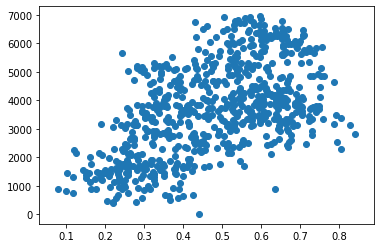

In [11]:
plt.scatter(bike_sharing['atemp'], bike_sharing['registered'])
plt.show()

In [12]:
correlation = 'positive'

Above we learned that columns can be positively or negatively correlated (or not correlated at all).

Some pairs of columns have a **stronger (or weaker)** correlation than others. The **correlation between columns X and Y can be stronger than that between columns X and Z**.

If we look at the two graphs below, it's easier to tell the overall direction of the points for the graph on the left. That's because the correlation between `temp` and `cnt` is stronger than that between `windspeed` and `cnt`.

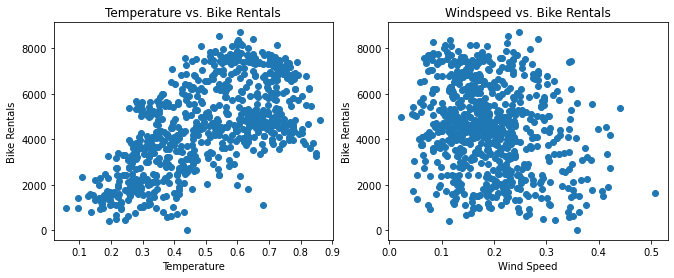

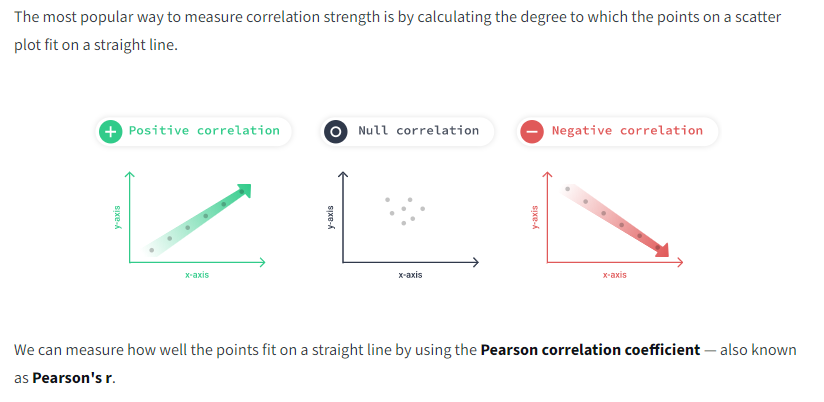

Pearson's r values lie between `-1.00` and `+1.00`. 
* When the **positive correlation is perfect**, the **Pearson's r is equal to +1.00**. 
* When the **negative correlation is perfect**, the **Pearson's r is equal to -1.00**. 
* A value of `0.0` shows **no correlation**.

Below, we see various scatter plot shapes along with their corresponding Pearson's r.

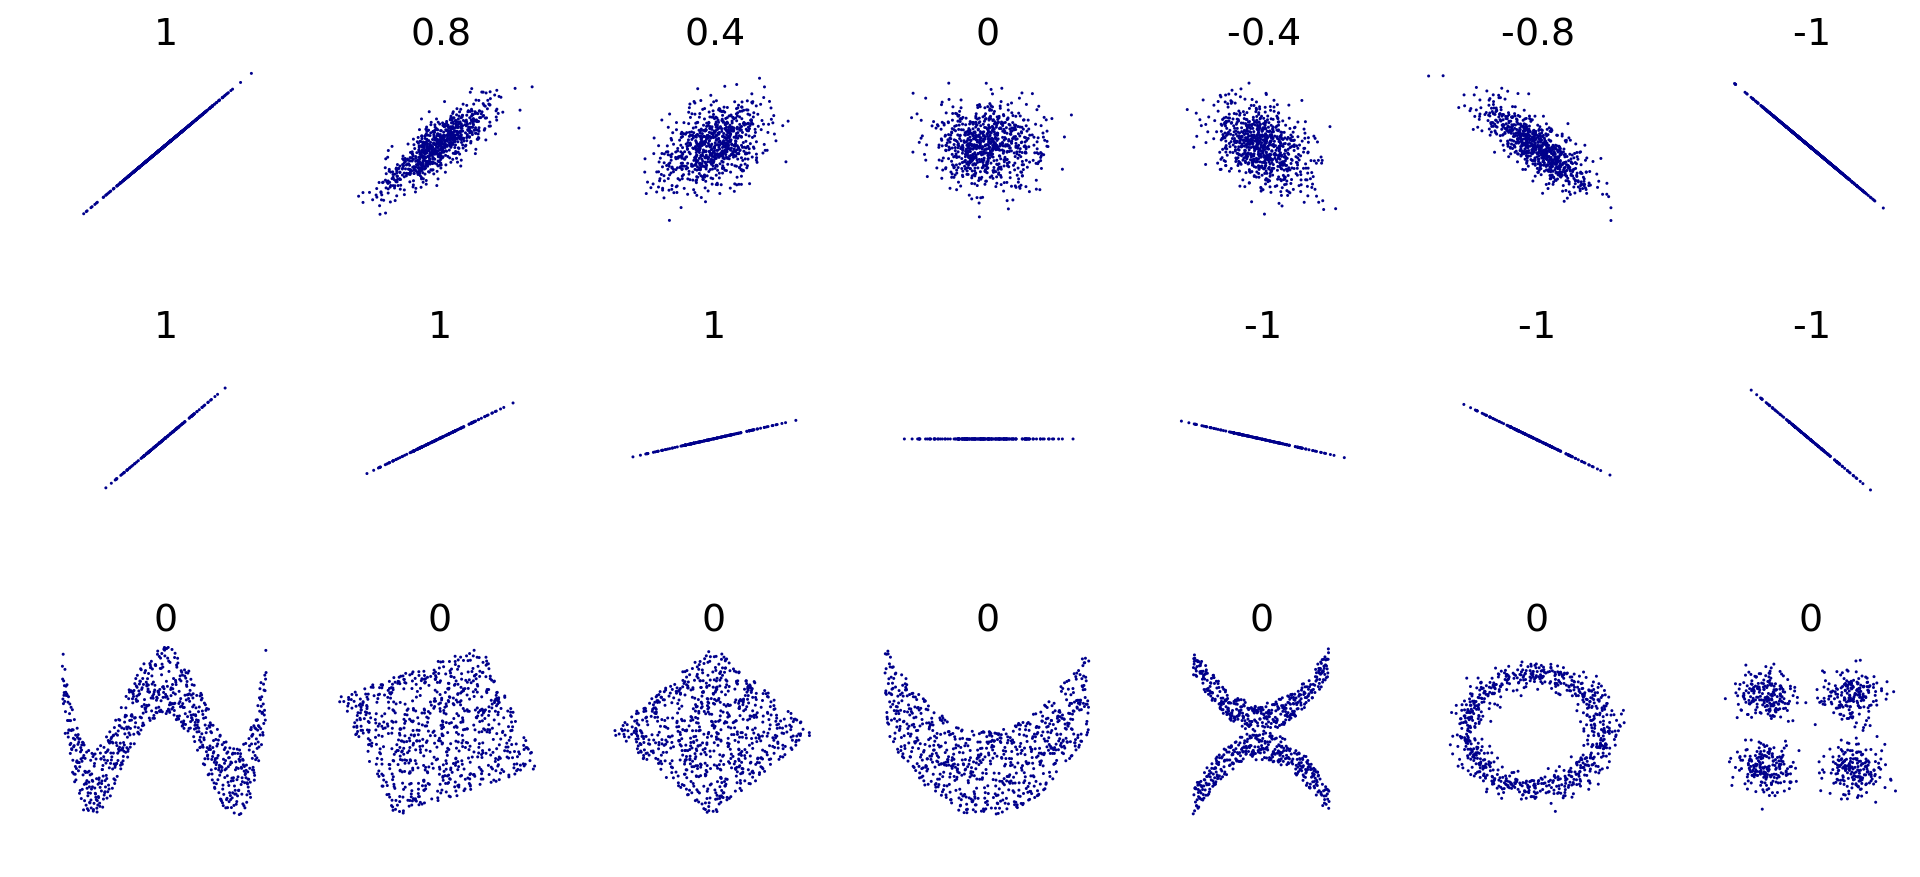

If columns X and Y have `r = +0.8`, and columns X and Z have `r = -0.8`, then the strength of these two correlations is equal. The **minus sign** only tells us that the **correlation is negative, not that it is weaker**.

For example, even though the number `+0.2` is greater than `-0.6`, a **-0.6 correlation is stronger compared to a +0.2 correlation**.

When we compare correlation strengths, we need to ignore the signs and only look at the absolute **r values**. The sign only gives us the correlation's direction, not its strength.

**Task**

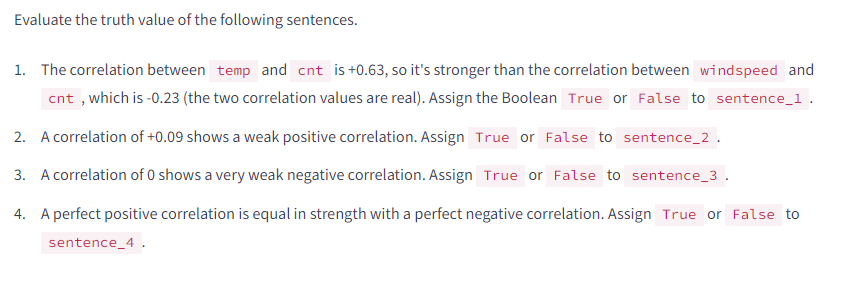

**Answer**

In [13]:
sentence_1 = True
sentence_2 = True
sentence_3 = False
sentence_4 = True

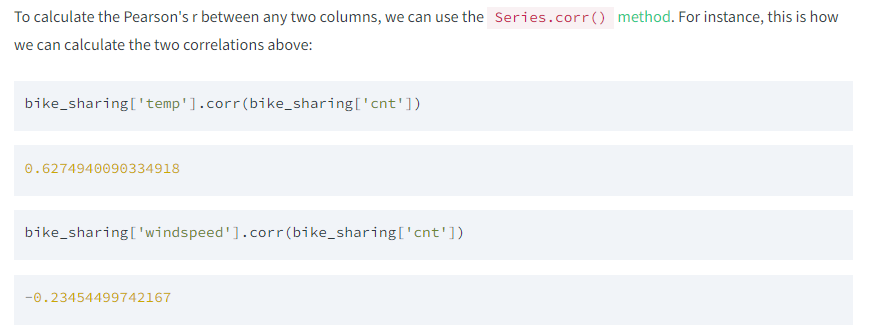

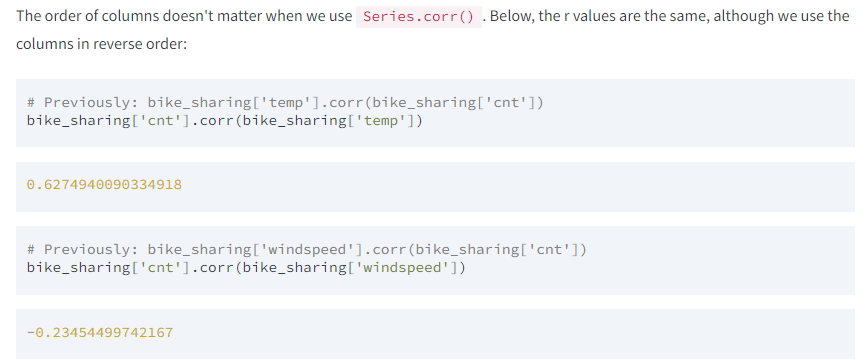

`Series.corr()` uses a math formula that only works with numbers. This means that `Series.corr()` only works with `numerical` columns — if we use `string` or `datetime` columns, we'll get an error.

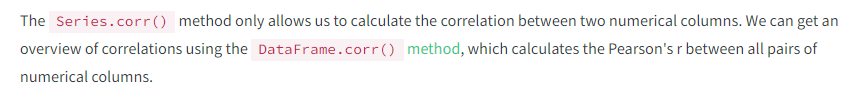

In [15]:
bike_sharing.corr()

instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.248546  0.123006  0.054274  0.059923   
registered  0.659623  0.411623  0.594248  0.293488 -0.108745  0.057367   
cnt         0.628830  0.406100  0.566710  0.279977 -0.068348  0.067443   

            workingday  weathersit      temp     atemp       hum  windspeed  \
instant      -0.004337   -0.021477  0.150580  0.152638  0.016375  -0.112620   
season        0.012485    0.019211  0.334315  0.342876  0.205445  -0.229046   
yr           -0.002013   -0.048727  0.047604  0.046106 -0.110651  -0.011817   
mnth         -0.005901    0.043528  0.220205  0.227459  0.222204  -0.207502   
holiday      -0.253023   -0.034627 -0.028556 -0.032507 -0.015937   0.006292   
weekday       0.035790    0.031087 -0.000170 -0.007537 -0.052232   0.014282   
workingday    1.000000    0.061200  0.052660  0.052182  0.024327  -0.018796   
weathersit    0.061200    1.000000 -0.120602 -0.121583  0.591045   0.039511   
temp          0.052660   -0.120602  1.000000  0.991702  0.126963  -0.157944   
atemp         0.052182   -0.121583  0.991702  1.000000  0.139988  -0.183643   
hum           0.024327    0.591045  0.126963  0.139988  1.000000  -0.248489   
windspeed    -0.018796    0.039511 -0.157944 -0.183643 -0.248489   1.000000   
casual       -0.518044   -0.247353  0.543285  0.543864 -0.077008  -0.167613   
registered    0.303907   -0.260388  0.540012  0.544192 -0.091089  -0.217449   
cnt           0.061156   -0.297391  0.627494  0.631066 -0.100659  -0.234545   

              casual  registered       cnt  
instant     0.275255    0.659623  0.628830  
season      0.210399    0.411623  0.406100  
yr          0.248546    0.594248  0.566710  
mnth        0.123006    0.293488  0.279977  
holiday     0.054274   -0.108745 -0.068348  
weekday     0.059923    0.057367  0.067443  
workingday -0.518044    0.303907  0.061156  
weathersit -0.247353   -0.260388 -0.297391  
temp        0.543285    0.540012  0.627494  
atemp       0.543864    0.544192  0.631066  
hum        -0.077008   -0.091089 -0.100659  
windspeed  -0.167613   -0.217449 -0.234545  
casual      1.000000    0.395282  0.672804  
registered  0.395282    1.000000  0.945517  
cnt         0.672804    0.945517  1.000000

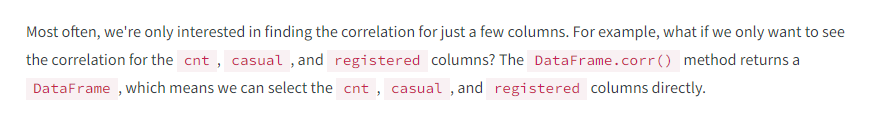

In [16]:
bike_sharing.corr()[['cnt', 'casual', 'registered']]

cnt    casual  registered
instant     0.628830  0.275255    0.659623
season      0.406100  0.210399    0.411623
yr          0.566710  0.248546    0.594248
mnth        0.279977  0.123006    0.293488
holiday    -0.068348  0.054274   -0.108745
weekday     0.067443  0.059923    0.057367
workingday  0.061156 -0.518044    0.303907
weathersit -0.297391 -0.247353   -0.260388
temp        0.627494  0.543285    0.540012
atemp       0.631066  0.543864    0.544192
hum        -0.100659 -0.077008   -0.091089
windspeed  -0.234545 -0.167613   -0.217449
casual      0.672804  1.000000    0.395282
registered  0.945517  0.395282    1.000000
cnt         1.000000  0.672804    0.945517

In [18]:
temp_atemp_corr = bike_sharing['temp'].corr(bike_sharing['atemp'])
wind_hum_corr = bike_sharing['windspeed'].corr(bike_sharing['hum'])

print(temp_atemp_corr,wind_hum_corr)

0.9917015532294636 -0.24848909864371405


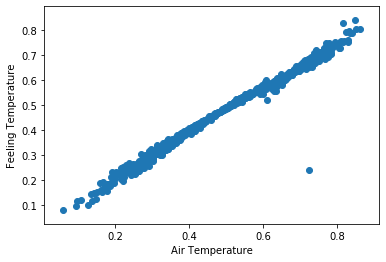

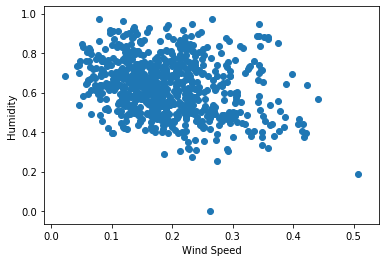

In [19]:
plt.scatter(bike_sharing['temp'], bike_sharing['atemp'])
plt.xlabel('Air Temperature')
plt.ylabel('Feeling Temperature')
plt.show()

plt.scatter(bike_sharing['windspeed'], bike_sharing['hum'])
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.show()

Above, we introduced `Series.corr()` and `DataFrame.corr()` as methods we can use to measure Pearson's. We also mentioned that `Series.corr()` only works with numerical columns, and inputting strings or datetime objects results in an error.

Generally, numerical columns describe a quantity — how much there is of something.

But we also have columns that describe qualities — what or how something is. These columns are **categorical (or qualitative)**.

One example of a **categorical column (also called categorical variable)** is the `workingday` column. This column describes the type of day: **a working day or a non-working day (weekend or holiday)**.

In [20]:
bike_sharing['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

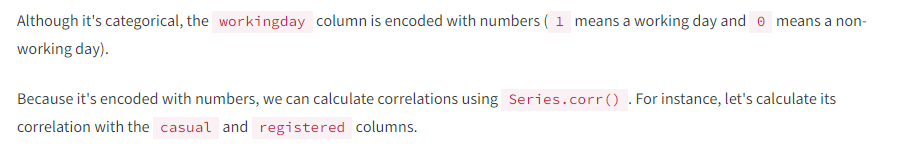

In [21]:
bike_sharing.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

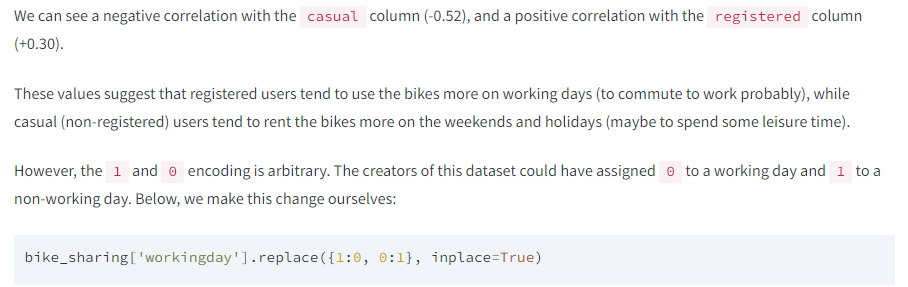

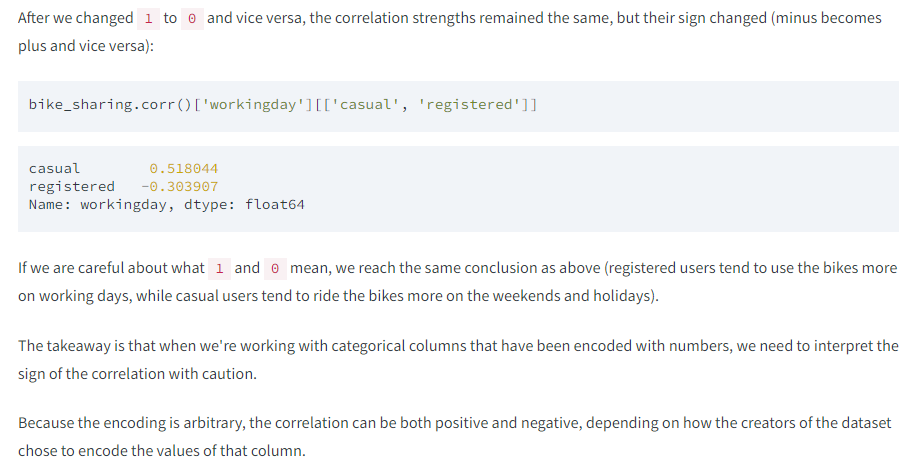

Often, the best thing we can do is acknowledge that there's a correlation but avoid talking about the correlation as being positive or negative.

We're going to use the `weathersit` column, which is categorical and has four unique values describing the weather:

* `1`: clear or few clouds
* `2`: mist or cloudy
* `3`: light rain, light snow, thunderstorm
* `4`: heavy rain, snow, ice pellets, fog

**Task**

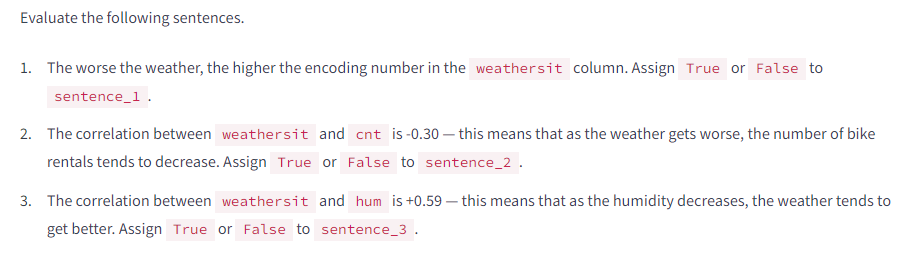

**Answer**

When we find a strong correlation between two columns, **one common mistake** is to assume that the columns must also have a **relationship of causality** — one is the cause, and the other is the effect.

For instance, let's say we found a strong positive correlation between the number of bike rentals and ice cream sales. When the number of bike rentals goes up, the number of ice cream sales tends to go up as well. When bike rentals decrease, ice cream sales tend to decrease too.

The positive correlation doesn't imply that ice cream sales are causing bike rentals to increase or decrease (or vice versa). Most likely, both ice cream sales and bike rentals are related to temperature variations in a similar way, and this is why they change together similarly

However, correlation can suggest **causality**. If two columns are correlated, it might be because of a **cause-and-effect relationship**. To establish a relationship of causality, we often need to perform a rigorous experiment.

The overarching point is that proving causality requires more than just correlation. We can't say that **X is the cause of Y simply because columns X and Y are strongly correlated**. In other words, **correlation does not imply causation**.

We learned about the following:

* Seasonal trends and how to identify them using line graphs.
* Scatter plots and how to generate one using Matplotlib.
* How to visualize correlations using scatter plots.
* How to measure correlation using Pearson's r.
* How to interpret correlation values correctly.